In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing


## Exploratory Data Analysis and Visualization

In [3]:
df_raw = pd.read_csv("/content/drive/MyDrive/Unprocessed_data.csv")

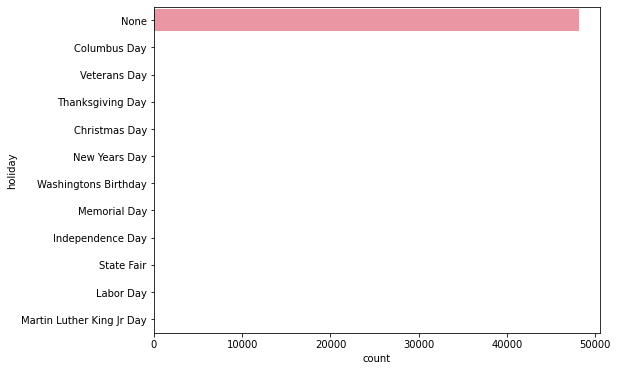

In [108]:
#Plotting frequency of each category in holiday column
plt.figure(figsize = (8,6))
sns.countplot(y='holiday', data = df_raw)
plt.show()

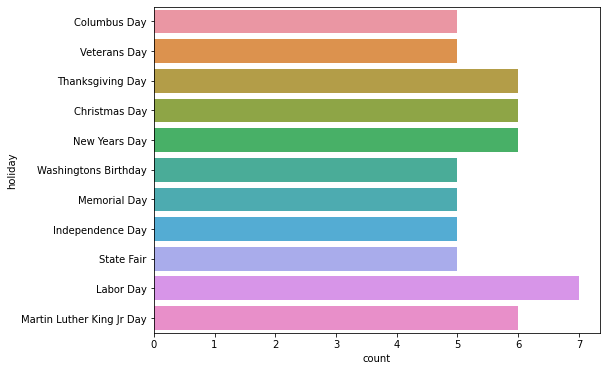

In [109]:
#'None' is far greater than the other days. Removing None data to visualize the others
holidays = df_raw.loc[df_raw.holiday != 'None']
plt.figure(figsize=(8,6))
sns.countplot(y='holiday', data= holidays)
plt.show()

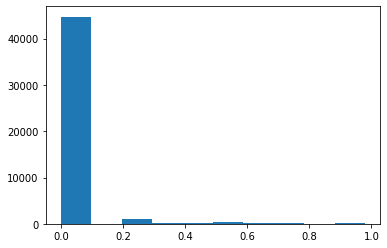

In [110]:
#Plotting observations with values less than 1mm rain shows that more than 40000 observations are around 0.
plt.hist(df_raw.rain_1h.loc[df_raw.rain_1h<1])
plt.show()

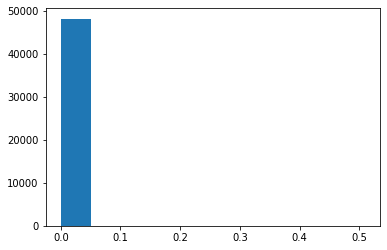

In [111]:
#Plotting snow variable indicates that data is again skewed and most of the observations have value close to 0.0.
plt.hist(df_raw.snow_1h)
plt.show()

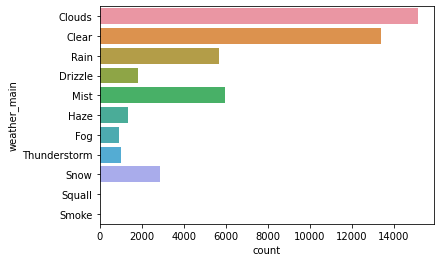

In [112]:
#exploring different categories in weather_main
sns.countplot(y='weather_main', data=df_raw)

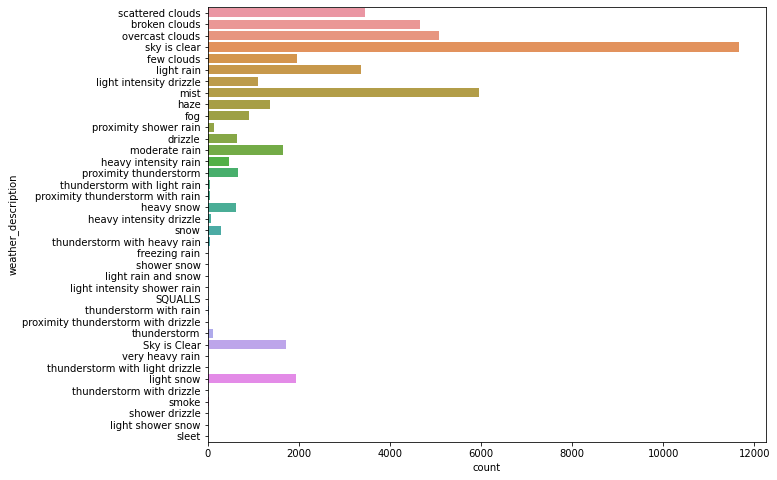

In [113]:
#exploring different categories in weather_description
plt.figure(figsize=(10,8))
sns.countplot(y='weather_description', data=df_raw)
plt.show()

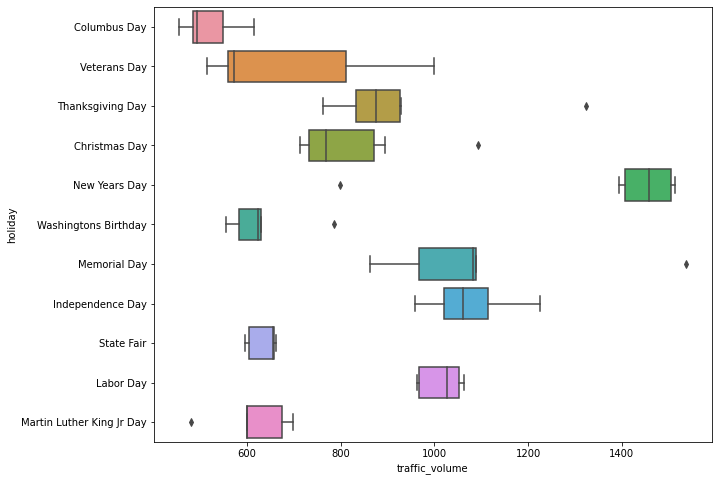

In [114]:
#Exploring traffic volume on holidays
plt.figure(figsize=(10,8))
sns.boxplot(y='holiday',x='traffic_volume', data = holidays)
plt.show()

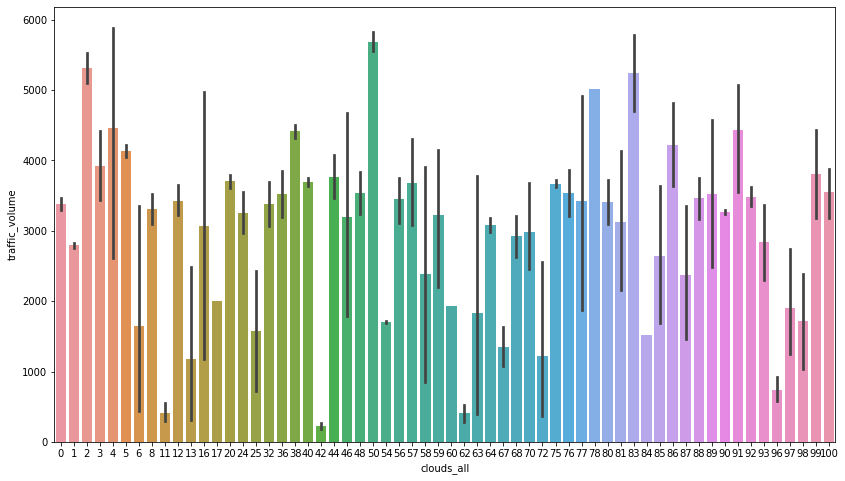

In [115]:
#Plotting traffic volume over clouds_all
plt.figure(figsize=(14,8))
sns.barplot(x='clouds_all', y = 'traffic_volume', data = df_raw)
plt.show()


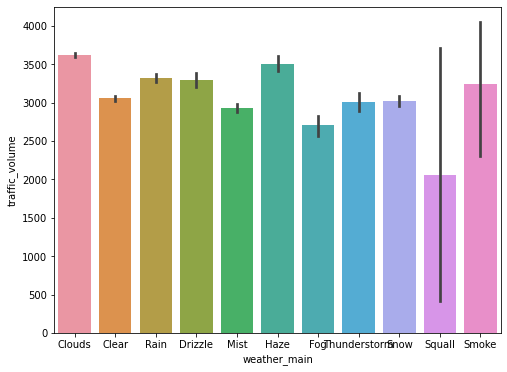

In [116]:
#Plotting weather_main over traffic volume
plt.figure(figsize=(8,6))
sns.barplot(x='weather_main', y = 'traffic_volume', data = df_raw)
plt.show()

# Preprocessing

In [4]:
df_pre = df_raw.copy()

In [5]:
df_pre.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [6]:
independentColumns=['holiday','weather_main','weather_description']
for uniquevalue in independentColumns:
  print(df_pre[uniquevalue].unique())  
  print("There are {} values in {} Column".format(len(df_pre[uniquevalue].unique()),uniquevalue))
  print("*****************************************************")
  print("\n")

['None' 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']
There are 12 values in holiday Column
*****************************************************


['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke']
There are 11 values in weather_main Column
*****************************************************


['scattered clouds' 'broken clouds' 'overcast clouds' 'sky is clear'
 'few clouds' 'light rain' 'light intensity drizzle' 'mist' 'haze' 'fog'
 'proximity shower rain' 'drizzle' 'moderate rain' 'heavy intensity rain'
 'proximity thunderstorm' 'thunderstorm with light rain'
 'proximity thunderstorm with rain' 'heavy snow' 'heavy intensity drizzle'
 'snow' 'thunderstorm with heavy rain' 'freezing rain' 'shower snow'
 'light rain and snow' 'light intensity shower rain' 'SQUALLS'
 'thunderstorm with rain' 'pr

In [7]:
# Examine the value
print(df_pre.rain_1h)
print("*****************************************************")
print(df_pre.snow_1h)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
48199    0.0
48200    0.0
48201    0.0
48202    0.0
48203    0.0
Name: rain_1h, Length: 48204, dtype: float64
*****************************************************
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
48199    0.0
48200    0.0
48201    0.0
48202    0.0
48203    0.0
Name: snow_1h, Length: 48204, dtype: float64


In [8]:
df_pre['date_time'] = pd.to_datetime(df_pre.date_time)
df_pre['weekday'] = df_pre.date_time.dt.weekday
df_pre['date'] = df_pre.date_time.dt.date
df_pre['hour'] = df_pre.date_time.dt.hour
df_pre['month'] = df_pre.date_time.dt.month
df_pre['year'] = df_pre.date_time.dt.year

In [9]:
df_pre['rain_1h'] = df_pre['rain_1h'].astype(float, errors = 'raise')

In [10]:
df_pre['snow_1h'] = df_pre['snow_1h'].astype(float, errors = 'raise')

In [11]:
def modify_snow1h(x):
    if x==0:
        return 'No_Snow'
    else:
        return 'Snow'
    
df_pre['snow_1h'] = df_pre.snow_1h.map(modify_snow1h)

In [12]:
def modify_rain1h(x):
    if x<=0.2:
        return 'No_rain'
    else:
        return 'Rain'
    
df_pre['rain_1h'] = df_pre.rain_1h.map(modify_rain1h)

In [13]:
df_pre.weather_description.unique()


array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

In [14]:
df_pre.weather_main.unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [15]:
df_pre['weather_description'] = df_pre['weather_description'].map(lambda x:x.lower())

In [16]:
weatherDescription = ['sky is clear','mist','overcast clouds','broken clouds','scattered clouds','light rain','few clouds','light rain','few clouds','light snow','moderate rain','haze',' high intensity drizzle','fog','drizzle','heavy snow','heavy intensity rain','snow']

In [17]:
df_pre["weather_description"].value_counts()

sky is clear                           13391
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thunderstorm with light rain              54
proximity 

In [18]:
df_pre.loc[np.logical_not(df_pre['weather_description'].isin(weatherDescription)),'weather_description'] = 'other'

In [19]:
df_pre["weather_description"].value_counts()

sky is clear            13391
mist                     5950
overcast clouds          5081
broken clouds            4666
scattered clouds         3461
light rain               3372
other                    2418
few clouds               1956
light snow               1946
moderate rain            1664
haze                     1360
fog                       912
drizzle                   651
heavy snow                616
heavy intensity rain      467
snow                      293
Name: weather_description, dtype: int64

In [20]:
def kelvinToCelsius(kelvin):
    return kelvin - 273.15

df_pre['temp'] = df_pre.temp.map(kelvinToCelsius)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


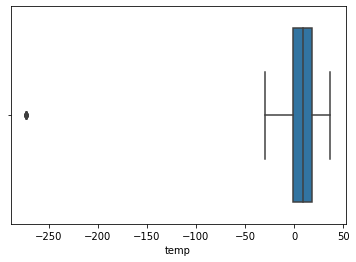

In [21]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = df_pre)
plt.show()

In [22]:
#Finding outlier index
print(np.where(df_pre['temp']<-50))

(array([11898, 11899, 11900, 11901, 11946, 11947, 11948, 11949, 11950,
       11951]),)


In [23]:
# IQR
Q1 = np.percentile(df_pre['temp'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_pre['temp'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_pre.shape)
 
# Upper bound
upper = np.where(df_pre['temp'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_pre['temp'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df_pre.drop(upper[0], inplace = True)
df_pre.drop(lower[0], inplace = True)
 
print("New Shape: ", df_pre.shape)

Old Shape:  (48204, 14)
New Shape:  (48194, 14)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


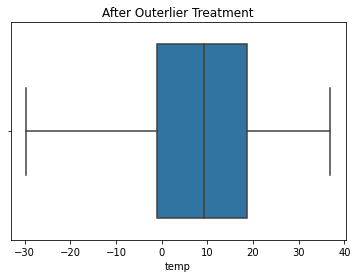

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = df_pre)
plt.title("After Outerlier Treatment")
plt.show()

In [25]:
df_pre.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,None,15.13,No_rain,No_Snow,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,9,10,2012
1,None,16.21,No_rain,No_Snow,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,10,10,2012
2,None,16.43,No_rain,No_Snow,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,11,10,2012
3,None,16.98,No_rain,No_Snow,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,12,10,2012
4,None,17.99,No_rain,No_Snow,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,13,10,2012


In [26]:
def modify_holiday(x):
    if x == 'None':
        return "No_Holiday"
    else:
        return "Holiday"
df_pre['holiday'] = df_pre['holiday'].map(modify_holiday)

In [27]:
# Resetting Data
df_pre.set_index('date', inplace = True)

In [28]:
df_pre.drop(['date_time'], axis = 1,inplace=True)

In [29]:
df_final = df_pre

In [31]:
from sklearn import preprocessing
catVars = ['holiday','rain_1h','snow_1h','weather_main','weather_description','weekday','hour','month']
label_encoder = preprocessing.LabelEncoder()
for Vari in catVars:
  label_encoder.fit(df_final[Vari])
  label_encoder_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
  print(label_encoder_name_mapping)
  print("*****************************************************************************************************************")

{'Holiday': 0, 'No_Holiday': 1}
*****************************************************************************************************************
{'No_rain': 0, 'Rain': 1}
*****************************************************************************************************************
{'No_Snow': 0, 'Snow': 1}
*****************************************************************************************************************
{'Clear': 0, 'Clouds': 1, 'Drizzle': 2, 'Fog': 3, 'Haze': 4, 'Mist': 5, 'Rain': 6, 'Smoke': 7, 'Snow': 8, 'Squall': 9, 'Thunderstorm': 10}
*****************************************************************************************************************
{'broken clouds': 0, 'drizzle': 1, 'few clouds': 2, 'fog': 3, 'haze': 4, 'heavy intensity rain': 5, 'heavy snow': 6, 'light rain': 7, 'light snow': 8, 'mist': 9, 'moderate rain': 10, 'other': 11, 'overcast clouds': 12, 'scattered clouds': 13, 'sky is clear': 14, 'snow': 15}
**********************************************

In [32]:
# Label Encoding
for values in catVars:
  df_final[values]= label_encoder.fit_transform(df_final[values])

In [33]:
df_final.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,weekday,hour,month,year
date,,,,,,,,,,,,
2012-10-02,1,15.13,0,0,40,1,13,5545,1,9,9,2012
2012-10-02,1,16.21,0,0,75,1,0,4516,1,10,9,2012
2012-10-02,1,16.43,0,0,90,1,12,4767,1,11,9,2012
2012-10-02,1,16.98,0,0,90,1,12,5026,1,12,9,2012
2012-10-02,1,17.99,0,0,75,1,0,4918,1,13,9,2012


# Model Building

In [34]:
X = df_final[['holiday','temp','rain_1h','snow_1h','clouds_all','weather_main','weather_description','weekday','hour','month','year']]
y = df_final[['traffic_volume']]

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

In [36]:
X_train.shape, X_test.shape

((32289, 11), (15905, 11))

In [37]:
y_train.shape, y_test.shape

((32289, 1), (15905, 1))

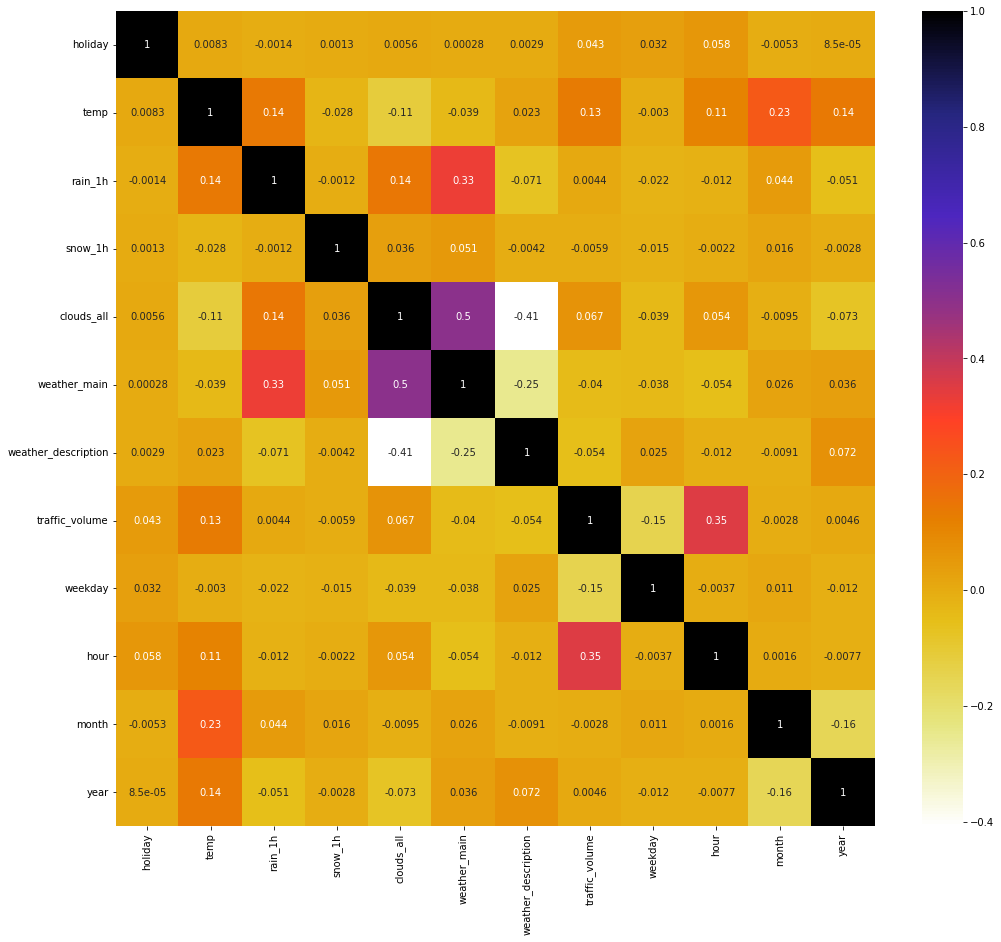

In [38]:
plt.figure(figsize=(17,15))
cor = df_final.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [39]:
# Model selection
#We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X_train, y_train.values.ravel())

In [41]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,1814.604174,0.163113
1,Ridge Regression,1814.601704,0.163116
2,Lasso Regression,1814.708951,0.163018
3,K Neighbors Regressor,811.615626,0.832633
4,Decision Tree Regressor,603.175373,0.908873
5,Random Forest Regressor,445.330794,0.949593
6,Gradient Boosting Regressor,579.021091,0.914759
7,Adaboost Regressor,834.549048,0.820928


# Hyperparameter Tuning



In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

num_estimators = [500,1000]
learn_rates = [0.02, 0.05]
max_depths = [1, 2]
min_samples_leaf = [5,10]
min_samples_split = [5,10]

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

GBR_Hyper = RandomizedSearchCV(GradientBoostingRegressor(loss='huber'), param_grid, random_state=1, n_iter=10, cv=5, verbose=0, n_jobs=-1)

GBR_Hyper.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(loss='huber'),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.02, 0.05],
                                        'max_depth': [1, 2],
                                        'min_samples_leaf': [5, 10],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [500, 1000]},
                   random_state=1)

In [43]:
GBR_Hyper.best_params_

{'learning_rate': 0.05,
 'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [50]:
GBR_Hyper.score(X_test,y_test)

0.9113514788159072

In [73]:
GradientBoostingRegressor(learning_rate= 0.05,
 max_depth= 2,
 min_samples_leaf= 5,
 min_samples_split= 10,
 n_estimators= 1000)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, min_samples_leaf=5,
                          min_samples_split=10, n_estimators=1000)

# Hybrid-Model Building

In [96]:
from sklearn.ensemble import StackingRegressor

baseEstimators = [
    ('DTR', DecisionTreeRegressor()),
    ('RFR', RandomForestRegressor())
]
hybridModel = StackingRegressor(
    estimators=baseEstimators,
    final_estimator=GradientBoostingRegressor()
)

In [98]:
hybridModel.fit(X_train, y_train.values.ravel()).score(X_test, y_test)

0.9561866032656688

In [99]:
from sklearn.linear_model import LinearRegression

r2_score = hybridModel.score(X_test,y_test)
print("Final accuracy",r2_score*100,'%')

Final accuracy 95.61866032656688 %


In [102]:
y_pred = hybridModel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


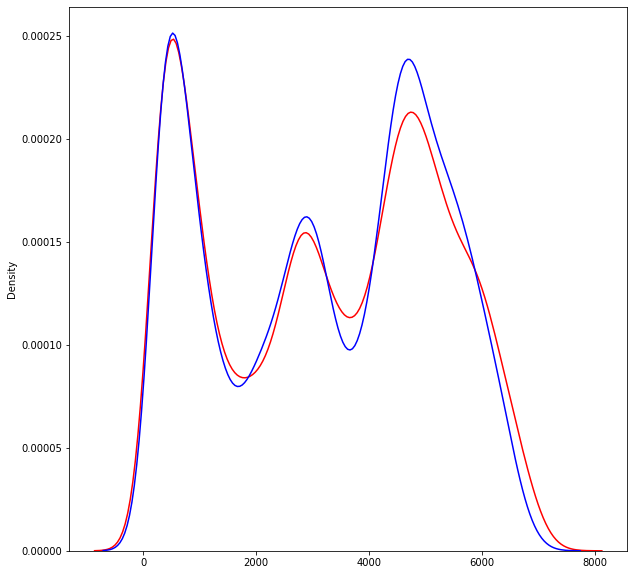

In [103]:
# To check the prediction and closeness of predict data 
plt.figure(figsize=(10, 10))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value") # hist=True
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.show()
plt.close()

In [104]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 229.54
Mean squared error = 173996.9
Median absolute error = 121.71
Explain variance score = 0.96
R2 score = 0.96


In [ ]:
# Since default model Performs better lets export it #

# Exporting and Pickling

In [105]:
# loading library
import pickle

# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as files:
    pickle.dump(hybridModel, files)



# Load Saved Model
```
with open('model_pkl' , 'rb') as f:
    model = pickle.load(f)
```
